# **Interquartile Range : What is it ?**

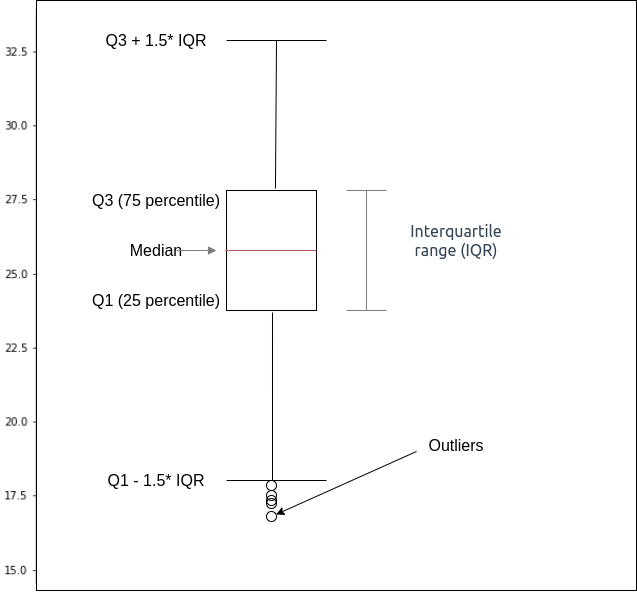

    The interquartile range (IQR) method is a statistical method used to identify and remove outliers from a dataset. It works by identifying the difference between the upper and lower quartiles (i.e., the 25th and 75th percentiles) of the data, and using this range to identify any data points that fall outside of it.

    To use the IQR method, you first need to calculate the first quartile (Q1) and the third quartile (Q3) of the data. The IQR is then calculated as the difference between Q3 and Q1. Any data points that fall outside of the range Q1 - 1.5 * IQR to Q3 + 1.5 * IQR are considered to be outliers and can be removed from the dataset.

    This method is often used in conjunction with other statistical methods, such as box plots, to help identify and visualize outliers in a dataset. It can be particularly useful for identifying and removing outliers from large datasets, as it is a relatively simple and straightforward method to use.

Watch these Youtube Videos for more details :

**IQR Method Exaplained** : https://www.youtube.com/watch?v=A3gClkblXK8

**Example** : https://www.youtube.com/watch?v=zEvXT4H2vus

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns                      
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)

-> We will work with the "new-york-city-airbnb-open-data" Dataset from Kaggle

In [95]:
df = pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [96]:
print('initial shape of the dataset :',df.shape)

initial shape of the dataset : (48895, 16)


In [97]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<AxesSubplot:xlabel='price'>

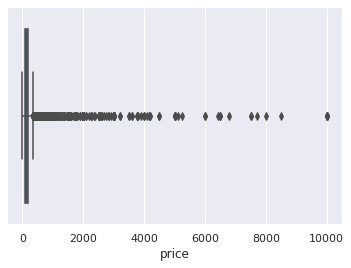

In [98]:
sns.boxplot(x=df['price'])

<AxesSubplot:xlabel='calculated_host_listings_count'>

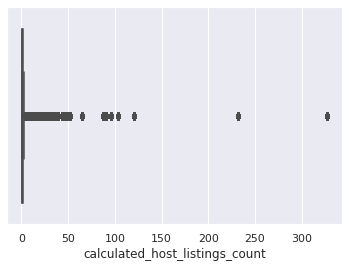

In [99]:
sns.boxplot(x=df['calculated_host_listings_count'])

<AxesSubplot:xlabel='reviews_per_month'>

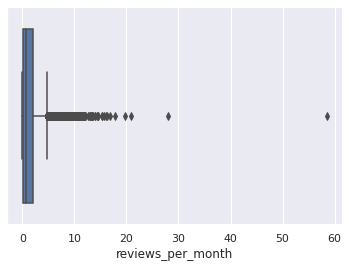

In [100]:
sns.boxplot(x=df['reviews_per_month'])

In [101]:
Q3 = df.quantile(0.75)
Q1 = df.quantile(0.25)
IQR = Q3 - Q1
IQR

id                                1.968023e+07
host_id                           9.961239e+07
latitude                          7.301500e-02
longitude                         4.679500e-02
price                             1.060000e+02
minimum_nights                    4.000000e+00
number_of_reviews                 2.300000e+01
reviews_per_month                 1.830000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  2.270000e+02
dtype: float64

In [102]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
lower_bound

id                               -2.004841e+07
host_id                          -1.415966e+08
latitude                          4.058058e+01
longitude                        -7.405326e+01
price                            -9.000000e+01
minimum_nights                   -5.000000e+00
number_of_reviews                -3.350000e+01
reviews_per_month                -2.555000e+00
calculated_host_listings_count   -5.000000e-01
availability_365                 -3.405000e+02
dtype: float64

In [103]:
upper_bound

id                                5.867253e+07
host_id                           2.568530e+08
latitude                          4.087264e+01
longitude                        -7.386608e+01
price                             3.340000e+02
minimum_nights                    1.100000e+01
number_of_reviews                 5.850000e+01
reviews_per_month                 4.765000e+00
calculated_host_listings_count    3.500000e+00
availability_365                  5.675000e+02
dtype: float64

In [109]:
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
#.any() method is used to check if any of the values in each row are True
# the ~ operator is used to negate the boolean array and select only rows where all values are False.
#This will select only rows that do not contain any outliers

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [110]:
print('Final shape of the dataset :',df.shape)

Final shape of the dataset : (27813, 16)


**After the IQR Method (48895 - 27813 = 21082) have been deleted from the dataset**

Here is what the price boxplot looks like after deleting outliers
 AxesSubplot(0.125,0.125;0.775x0.755)


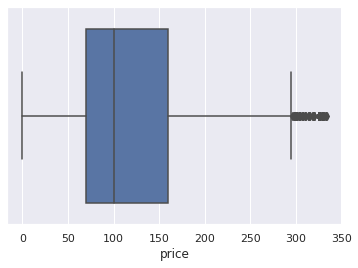

In [114]:
print('Here is what the price boxplot looks like after deleting outliers\n', sns.boxplot(x=df['price']))

*You now know how to delete outliers using the IQR method :)*